In [30]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [31]:
df=pd.read_csv("/content/test.csv")

In [32]:
df

,Unnamed: 0,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,0,120,284,27,62,100,False
1,1,113,282,33,64,135,False
2,2,128,279,28,64,115,True
3,3,108,282,23,67,125,True
4,4,136,286,25,62,93,False
...,...,...,...,...,...,...,...
1169,1169,113,275,27,60,100,False
1170,1170,128,265,24,67,120,False
1171,1171,130,291,30,65,150,True
1172,1172,125,281,21,65,110,False


In [34]:
df1 = df[["Maternal Smoker", "Maternal Age"]]

In [35]:
df1.groupby('Maternal Smoker').count()

,Maternal Age
Maternal Smoker,
False,715
True,459


#1.

In [36]:
smoker = df1['Maternal Age'] [df1['Maternal Smoker'] == True]
nonsmoker = df1['Maternal Age'] [df1['Maternal Smoker'] == False]



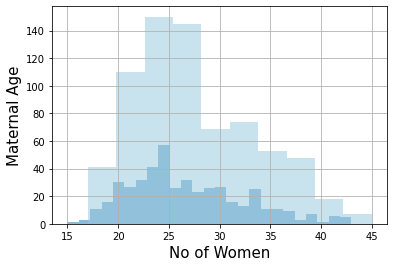

In [37]:
smoker.hist(histtype='stepfilled', alpha=0.5, bins=25) 
nonsmoker.hist(histtype='stepfilled', alpha=0.5, color=sns.desaturate("skyblue", .75), bins=10)
plt.xlabel('No of Women',fontsize=15)
plt.ylabel('Maternal Age',fontsize=15)
plt.show()

**INFERENCE:**The distribution of  mothers age who smoked is shifted slightly to the left of the distribution of non-smoking mothers. The weights of the babies of the mothers who smoked seem lower, on average than the weight of the babies of non smokers

#2.

Deciding whether two numerical samples come from the same underlying distribution is called A/B testing. 
The objective of our study is to see whether there is any difference in the ages of the smoking
and non-smoking mothers

So we can use A/B Hypothesis testing to reject or fail to reject the hypothesis.

#3.

**Null hypothesis:** In the population, the age of the mothers who smoke is equal to the age of the non-smokers..

**Alternative hypothesis:** In the population, the age of the mothers who smoke have a lower age, on average, than the age of the non-smokers.

#4.

The alternative hypothesis compares the average age of the two groups and says that the average for the mothers who smoke is smaller.
 So we can use the difference between 2 group means as statistic for simulation
 Small values of this statistic will favor the alternative hypothesis

#5.

In [38]:
means_table = df1.groupby('Maternal Smoker').mean()
observed_difference = means_table['Maternal Age'][1] - means_table['Maternal Age'][0]
observed_difference

-0.8076725017901509

#6.

In [40]:
sample = df1.sample(1174,replace = False)
sample

,Maternal Smoker,Maternal Age
1063,False,39
924,False,21
782,True,37
1047,True,18
580,True,20
...,...,...
62,True,36
116,False,23
153,False,29
655,True,21


In [41]:
sample_age = sample['Maternal Age']
type(sample_age)

pandas.core.series.Series

In [42]:
original_and_sample= df1.assign(sample_age=sample_age.values )

In [43]:
original_and_sample

,Maternal Smoker,Maternal Age,sample_age
0,False,27,39
1,False,33,21
2,True,28,37
3,True,23,18
4,False,25,20
...,...,...,...
1169,False,27,36
1170,False,24,23
1171,True,30,29
1172,False,21,21


In [44]:
all_group_means= original_and_sample.groupby('Maternal Smoker').mean()
all_group_means

,Maternal Age,sample_age
Maternal Smoker,,
False,27.544056,27.166434
True,26.736383,27.324619


In [47]:
test_statistic = all_group_means['sample_age'][0]- all_group_means['sample_age'][1]
test_statistic

-0.1581851699498742

#7.

In [48]:
import numpy as np
import array
differences = np.zeros(5000)

In [49]:
for i in np.arange(5000):
    age = df[['Maternal Smoker', 'Maternal Age']]
    sample = df1.sample(1174,replace = False)
    sample_age = sample['Maternal Age']
    original_and_sample = df1.assign(sample_age=sample_age.values )
    all_group_means= original_and_sample.groupby('Maternal Smoker').mean()
    difference = all_group_means['sample_age'][0]- all_group_means['sample_age'][1]
    differences[i] = difference

In [50]:
differences

array([-0.0401359 , -0.35851121, -0.35851121, ...,  0.05644987,
        0.34262992,  0.09222237])

In [51]:
differences_df = pd.DataFrame(differences)
differences_df

,0
0,-0.040136
1,-0.358511
2,-0.358511
3,-0.251194
4,0.113686
...,...
4995,0.024255
4996,-0.730545
4997,0.056450
4998,0.342630


Observed Difference: -0.8076725017901509


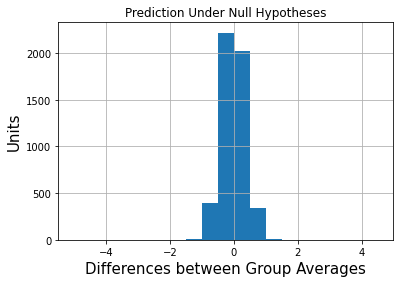

In [52]:
differences_df.hist(bins = np.arange(-5,5,0.5))
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('Units',fontsize=15);
print('Observed Difference:', observed_difference)

#8.

In [53]:
np.count_nonzero(differences <= observed_difference)/differences.size

0.014

#9.

9.

The empirical P-value is 0.014, meaning that some of the observed samples resulted in a difference of -0.807 or lower. This is an approximation; the exact chance of getting a difference in that range is not 0 but it is vanishingly small.